In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from corner import corner

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

### Estimating $\Omega$ & $\Lambda$ with All Distributions (Jensen-Shannon Distance)

#### Testing

In [3]:
from scipy.spatial.distance import jensenshannon as scipy_jsd
from scipy.optimize import minimize as scipy_minimize
from numpy.random import uniform as uni
from figaro.cosmology import CosmologicalParameters
from population_models.mass import plpeak

# dL distributions
def DLsq(DL, DLmax = 5000):
    return 3*DL**2/DLmax**3

pdf_figaro, mz, dL = [np.load('./result/result_multi_intermediate.npz')[parameter] for parameter in ['pdf_figaro', 'mz', 'dL']]

In [43]:
x0 = [uni(10,100), uni(10,50)]
bounds = ((10,100), (10,50))

i = 0

def jsd(x, i):
    z = CosmologicalParameters(x[0]/100, 0.315, 0.685, -1., 0., 0.).Redshift(dL)
    m = np.einsum("i, j -> ij", mz, np.reciprocal(1+z))
    
    p = np.einsum("ij, j -> ij", plpeak(m, mu=x[1]), DLsq(dL))
    p = np.sum(p, axis=1) # delta_dL and normalization of mz is included in scipy_jsd

    return scipy_jsd(p, pdf_figaro[i])

In [42]:
jsd([70,35], i)
# 2.7s

/users/chi-kit.ng/src/pop_models_lvk/population_models/mass.py:10: RuntimeWarning: overflow encountered in exp
  p[idx]       = 1./(1.+np.exp(exponent))


0.06080872753932336

In [49]:
scipy_minimize(jsd, x0=x0, bounds=bounds, args=(i,), method='Nelder-Mead').x
# 3m 36s

array([100.,  50.])

In [ ]:
scipy_minimize(jsd, x0=x0, bounds=bounds, args=(i,), method='Powell').x
# 4m 8s

/users/chi-kit.ng/src/pop_models_lvk/population_models/mass.py:10: RuntimeWarning: overflow encountered in exp
  p[idx]       = 1./(1.+np.exp(exponent))


array([70.2169537 , 35.40362984])

In [10]:
scipy_minimize(jsd, x0=x0, bounds=bounds, args=(i,), method='L-BFGS-B').x
# 1m 48s

array([70.22168951, 35.40244468])

In [11]:
scipy_minimize(jsd, x0=x0, bounds=bounds, args=(i,), method='TNC').x
# 6m 39s

array([70.2176632 , 35.40346237])

In [50]:
scipy_minimize(jsd, x0=x0, bounds=bounds, args=(i,), method='COBYLA').x
# 8m 55s

array([70.21874801, 35.40323823])

In [51]:
scipy_minimize(jsd, x0=x0, bounds=bounds, args=(i,), method='SLSQP').x
# 2m 26s

array([70.21548045, 35.40289703])

In [52]:
scipy_minimize(jsd, x0=x0, bounds=bounds, args=(i,), method='trust-constr').x
# 2m 47s

/users/chi-kit.ng/.conda/envs/population/lib/python3.10/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


array([70.21696298, 35.40364617])

In [47]:
import cma

xopt, es = cma.fmin2(jsd, x0, 10, {'bounds': [[10,10],[100,50]]}, args=(i,))

xopt
# 17m

array([70.18197174, 35.403644  ])

In [47]:
size = (20,10)
x = np.linspace(10, 100, size[0])
y = np.linspace(10, 50, size[1])
z = np.zeros(size)
for i in range(size[0]):
    for j in range(size[1]):
        x0 = [x[i], y[j]]
        z[i,j] = jsd(x0, 0)

/users/chi-kit.ng/src/pop_models_lvk/population_models/mass.py:10: RuntimeWarning: overflow encountered in exp
  p[idx]       = 1./(1.+np.exp(exponent))


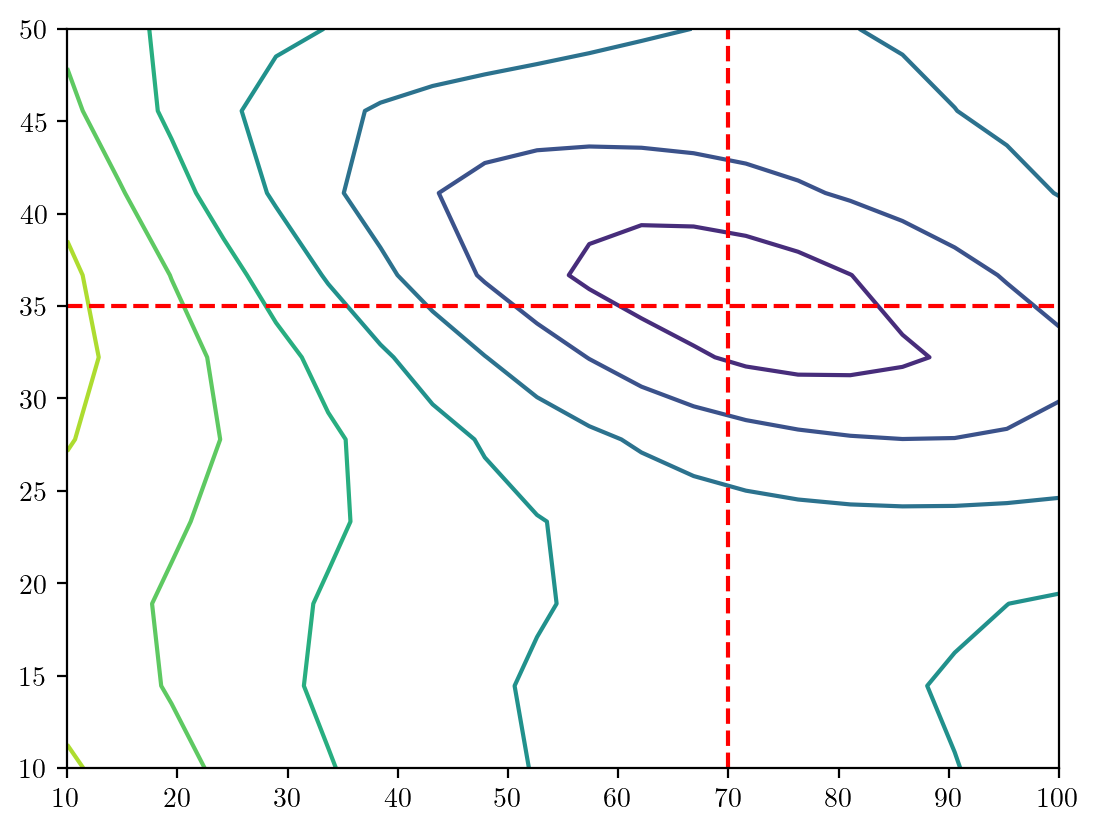

In [48]:
plt.contour(x, y, z.T)
plt.axvline(70, color='r', linestyle='--')
plt.axhline(35, color='r', linestyle='--')

#### Plots

In [3]:
methods = ['Nelder-Mead', 'Powell', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP', 'trust-constr', 'CMA-ES']

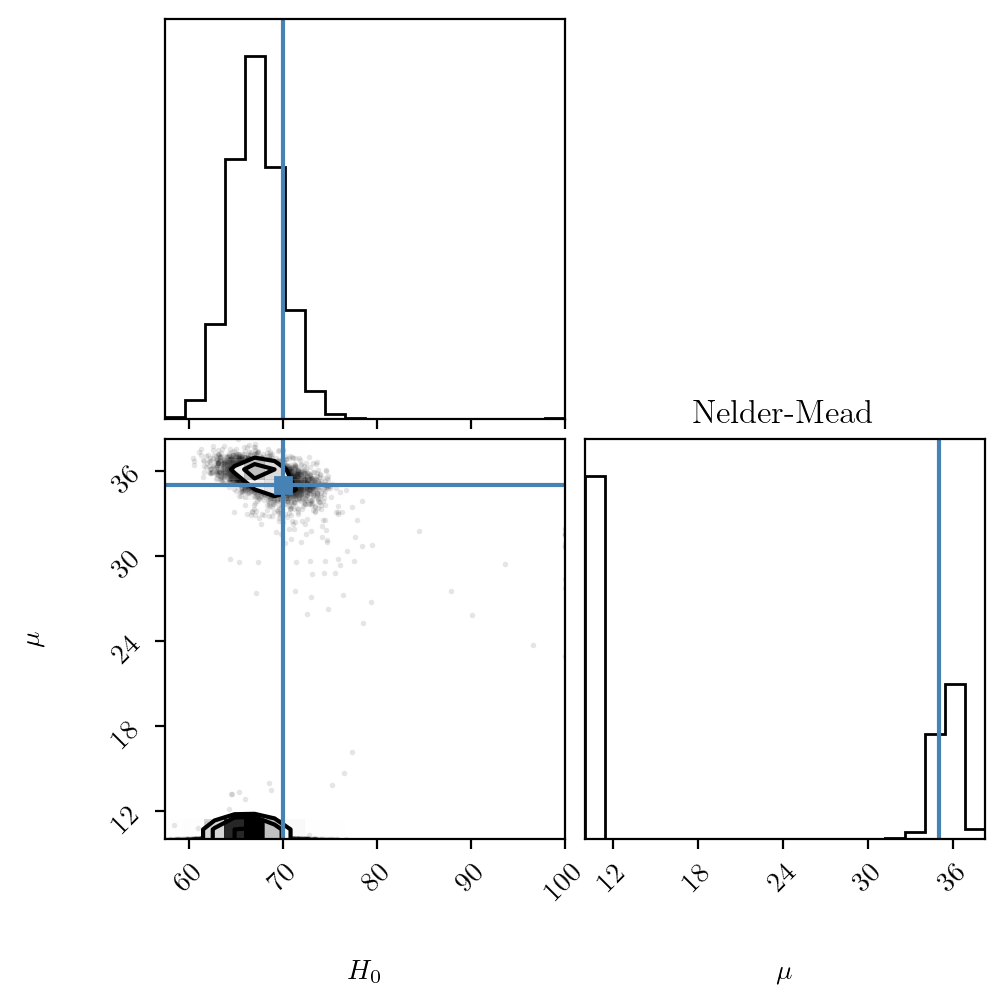

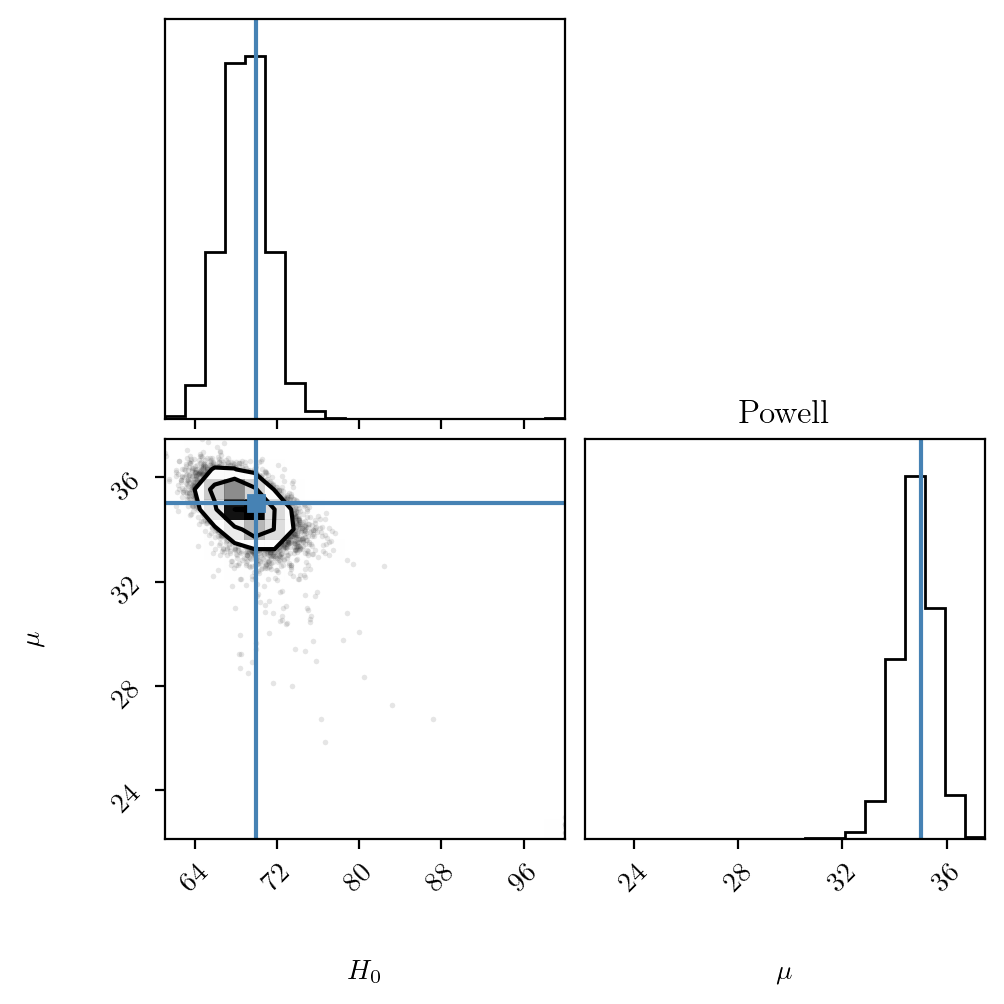

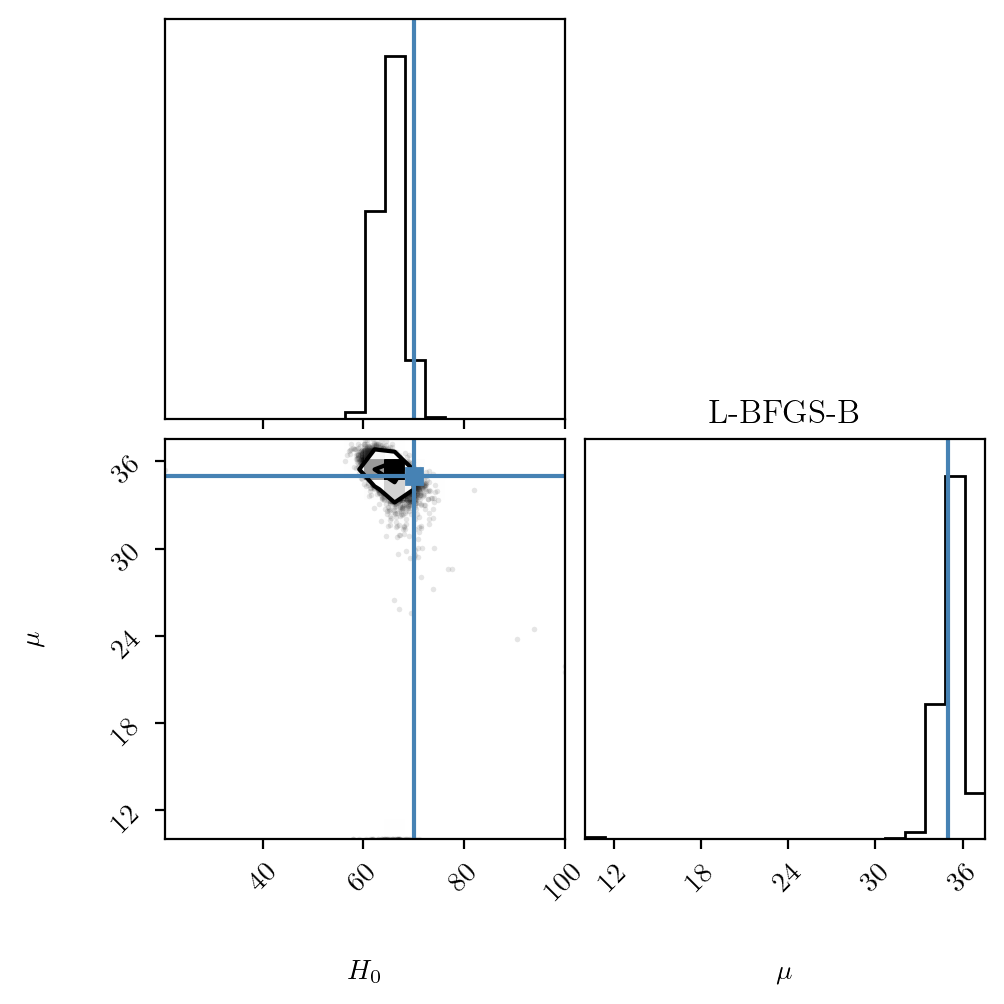

In [4]:
for method in methods:
    try:
        f = np.load("./result/result_mu_"+method+".npz")
        result = f['result']
        # mz_sample = f['Mz_sample']
        # figaro_pdf = f['pdf_figaro']

        corner(result, labels = ["$H_0$", "$\\mu$"], truths=[70, 35])
        # plt.savefig("./corner_H0_mu.pdf", bbox_inches='tight')
        plt.title(method)
        plt.show()
    except:
        pass

In [54]:
for method in methods:
    try:
        f = np.load("./result/result_alpha_"+method+".npz")
        result = f['result']
        # mz_sample = f['Mz_sample']
        # figaro_pdf = f['pdf_figaro']

        corner(result, labels = ["$H_0$", "$\\alpha$"], truths=[70, 3.5])
        # plt.savefig("./corner_H0_alpha.pdf", bbox_inches='tight')
        plt.title(method)
        plt.show()
    except:
        pass

In [55]:
for method in methods:
    try:
        f = np.load("./result/result_5"+method+".npz")
        result = f['result']
        # mz_sample = f['Mz_sample']
        # figaro_pdf = f['pdf_figaro']

        corner(result, labels = ["$H_0$", "$\\alpha$", "$\\mu$", "$\\sigma$", "$w$"], truths = [70, 3.5, 35, 5, 0.2])
        plt.title(method)
        plt.show()
    except:
        pass

In [56]:
for method in methods:
    try:
        f = np.load("./result/result_8"+method+".npz")
        result = f['result']
        # mz_sample = f['Mz_sample']
        # figaro_pdf = f['pdf_figaro']

        corner(result, labels = ["$H_0$", "$\\alpha$", "$\\mu$", "$\\sigma$", "$w$", "$M_{min}$", "$M_{max}$", "$\\delta$"], truths = [70, 3.5, 35, 5, 0.2, 5, 90, 5])
        plt.title(method)
        plt.show()
    except:
        pass